<a href="https://colab.research.google.com/github/yash83085/SL-3/blob/main/sl3(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/drive/MyDrive/SL-3_Datasets/Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [2]:
dataset.shape

(400, 5)

In [3]:
df = dataset.isnull().sum()
df

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
dataset.dtypes

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [6]:
dataset.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [7]:
dataset.shape

(400, 5)

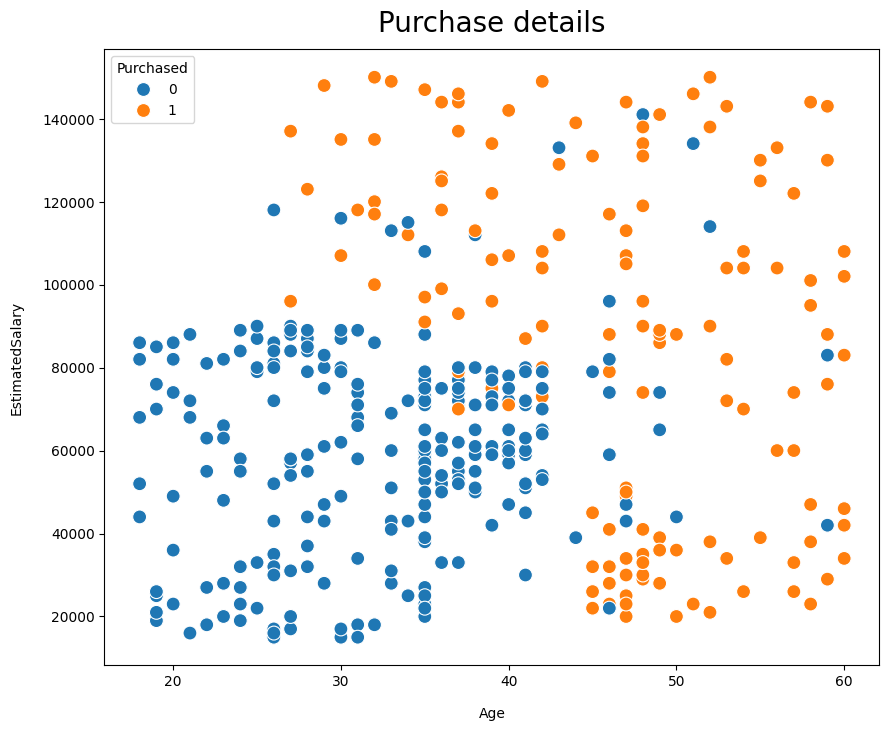

In [8]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=dataset,s=100)
plt.title("Purchase details",y=1.015, fontsize=20)
plt.xlabel("Age",labelpad=13)
plt.ylabel("EstimatedSalary", labelpad = 13)
ax=plt.gca()

In [9]:
from sklearn.model_selection import train_test_split
x=dataset[['Age','EstimatedSalary']].values
y=dataset['Purchased'].values
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state =0)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled  =  scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

In [12]:
logistic_regression.coef_

array([[-2.23102744e-09, -2.07854462e-06]])

In [13]:
logistic_regression.intercept_

array([-2.12654828e-10])

In [14]:
logistic_regression.predict([[20,30000]])

array([0])

In [15]:
logistic_regression.predict_proba([[20,30000]])

array([[0.51558405, 0.48441595]])

In [16]:
logistic_regression.predict_proba(X_test)

array([[0.54508557, 0.45491443],
       [0.52595847, 0.47404153],
       [0.538894  , 0.461106  ],
       [0.54095928, 0.45904072],
       [0.52595847, 0.47404153],
       [0.51039124, 0.48960876],
       [0.50779393, 0.49220607],
       [0.57427396, 0.42572604],
       [0.53527656, 0.46472344],
       [0.52232952, 0.47767048],
       [0.5254402 , 0.4745598 ],
       [0.52854892, 0.47145108],
       [0.52854892, 0.47145108],
       [0.53992681, 0.46007319],
       [0.5445701 , 0.4554299 ],
       [0.56049957, 0.43950043],
       [0.53992681, 0.46007319],
       [0.54405455, 0.45594545],
       [0.56714469, 0.43285531],
       [0.51143002, 0.48856998],
       [0.52440351, 0.47559649],
       [0.57427396, 0.42572604],
       [0.52647668, 0.47352332],
       [0.55434628, 0.44565372],
       [0.51454572, 0.48545428],
       [0.57274875, 0.42725125],
       [0.54508557, 0.45491443],
       [0.54147539, 0.45852461],
       [0.53217295, 0.46782705],
       [0.54457011, 0.45542989],
       [0.

In [17]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = cm.ravel()
print("True Negative:",tn)
print("False Positive:",fp)
print("False Negative:",fn)
print("True Positive:",tp)

True Negative: 68
False Positive: 0
False Negative: 32
True Positive: 0


In [18]:
# Assigning columns names
cm_df = pd.DataFrame(cm,
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,68,0
Actual Positive,32,0


precision_score: 0.0
recall_score: 0.0
accuracy_score: 0.68
f1_score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


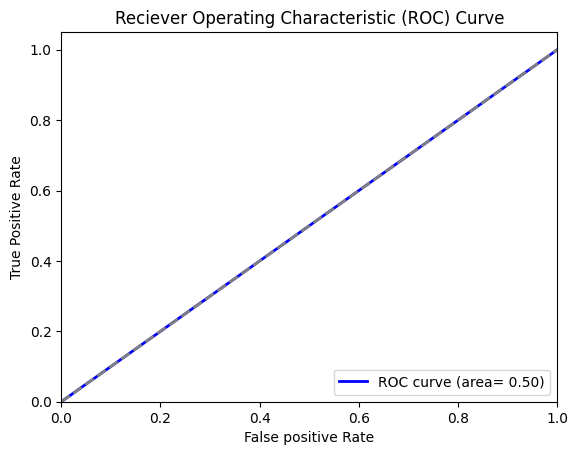

In [19]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_curve,auc
import matplotlib.pyplot as plt

p=metrics.precision_score(y_test, y_pred)
r=metrics.recall_score(y_test, y_pred)
a=metrics.accuracy_score(y_test, y_pred)
f1=metrics.f1_score(y_test, y_pred)

print("precision_score:",p)
print("recall_score:",r)
print("accuracy_score:",a)
print("f1_score:",f1)

fpr,tpr,threshold = roc_curve(y_test,y_pred)

roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='blue',lw=2,label='ROC curve (area= %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='gray',lw=2,linestyle='--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(8.222222222222223, 0.5, 'Predicted Label')

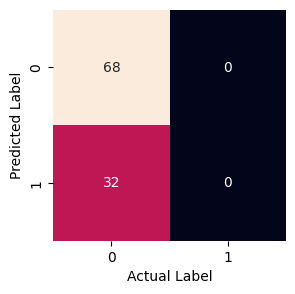

In [21]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(cm,annot=True,cbar=False)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")

In [22]:
err=(fn+fp)/(tn+fp+fn+tp)
err

0.32